<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

### 1. Import the data

In [2]:
csv_file = '/Users/ayano/Desktop/Data Science & AI/csv/ais.csv'

In [3]:
df = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [4]:
df.head()

Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0           1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1           2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2           3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3           4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4           5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   

      ht    wt sex   sport  
0  195.9  78.9   f  B_Ball  
1  189.7  74.4   f  B_Ball  
2  177.8  69.1   f  B_Ball  
3  185.0  74.9   f  B_Ball  
4  184.6  64.6   f  B_Ball

In [5]:
df.shape

(202, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat',
       'lbm', 'ht', 'wt', 'sex', 'sport'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcBfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [9]:
df[[#'Unnamed: 0', 
    'rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat',
       'lbm', 'ht', 'wt', 'sex', 'sport']]

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt  \
0    3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   
1    4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   
2    4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   
3    4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   
4    4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   
..    ...  ...   ...   ...   ...    ...    ...     ...    ...    ...   ...   
197  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00  183.9  93.2   
198  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00  183.5  80.0   
199  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00  183.1  73.8   
200  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00  178.4  71.1   
201  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00  190.8  76.7   

    sex   sport  
0     f  B_Ball  
1     f  B_Ball  
2     f  B_Ball  
3     f  B_Ball  
4     f  B_Ball  
..   ..     ...  
197   m  W_Polo  
198   m  Tennis  
199   m  Tennis  
200   m  Tennis  
201   m  Tennis  

[202 rows x 13 columns]

In [10]:
df.describe().T

count        mean        std     min       25%      50%      75%  \
Unnamed: 0  202.0  101.500000  58.456537    1.00   51.2500  101.500  151.750   
rcc         202.0    4.718614   0.457976    3.80    4.3725    4.755    5.030   
wcc         202.0    7.108911   1.800337    3.30    5.9000    6.850    8.275   
hc          202.0   43.091584   3.662989   35.90   40.6000   43.500   45.575   
hg          202.0   14.566337   1.362451   11.60   13.5000   14.700   15.575   
ferr        202.0   76.876238  47.501239    8.00   41.2500   65.500   97.000   
bmi         202.0   22.955891   2.863933   16.75   21.0825   22.720   24.465   
ssf         202.0   69.021782  32.565333   28.00   43.8500   58.600   90.350   
pcBfat      202.0   13.507426   6.189826    5.63    8.5450   11.650   18.080   
lbm         202.0   64.873713  13.070197   34.36   54.6675   63.035   74.750   
ht          202.0  180.103960   9.734494  148.90  174.0000  179.700  186.175   
wt          202.0   75.007921  13.925199   37.80   66.5250   74.400   84.125   

               max  
Unnamed: 0  202.00  
rcc           6.72  
wcc          14.30  
hc           59.70  
hg           19.20  
ferr        234.00  
bmi          34.42  
ssf         200.80  
pcBfat       35.52  
lbm         106.00  
ht          209.40  
wt          123.20

In [11]:
df.corr()

/var/folders/0z/jn67d04d61x09rscj406r8zr0000gn/T/ipykernel_3764/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0       rcc       wcc        hc        hg      ferr  \
Unnamed: 0    1.000000  0.658358  0.153908  0.660805  0.689778  0.441281   
rcc           0.658358  1.000000  0.147064  0.924964  0.888800  0.250865   
wcc           0.153908  0.147064  1.000000  0.153333  0.134720  0.132073   
hc            0.660805  0.924964  0.153333  1.000000  0.950757  0.258240   
hg            0.689778  0.888800  0.134720  0.950757  1.000000  0.308391   
ferr          0.441281  0.250865  0.132073  0.258240  0.308391  1.000000   
bmi           0.266935  0.299471  0.176968  0.320527  0.382524  0.302556   
ssf          -0.543638 -0.403004  0.136999 -0.449135 -0.435429 -0.108243   
pcBfat       -0.674826 -0.493512  0.107960 -0.532449 -0.531522 -0.183386   
lbm           0.579148  0.550975  0.102663  0.583375  0.610986  0.317581   
ht            0.317385  0.358854  0.076811  0.371192  0.352322  0.123255   
wt            0.370171  0.403763  0.155662  0.423711  0.455263  0.273702   

                 bmi       ssf    pcBfat       lbm        ht        wt  
Unnamed: 0  0.266935 -0.543638 -0.674826  0.579148  0.317385  0.370171  
rcc         0.299471 -0.403004 -0.493512  0.550975  0.358854  0.403763  
wcc         0.176968  0.136999  0.107960  0.102663  0.076811  0.155662  
hc          0.320527 -0.449135 -0.532449  0.583375  0.371192  0.423711  
hg          0.382524 -0.435429 -0.531522  0.610986  0.352322  0.455263  
ferr        0.302556 -0.108243 -0.183386  0.317581  0.123255  0.273702  
bmi         1.000000  0.321116  0.187558  0.713858  0.337097  0.845934  
ssf         0.321116  1.000000  0.963017 -0.207749 -0.071253  0.154196  
pcBfat      0.187558  0.963017  1.000000 -0.361850 -0.188022 -0.000193  
lbm         0.713858 -0.207749 -0.361850  1.000000  0.802119  0.930913  
ht          0.337097 -0.071253 -0.188022  0.802119  1.000000  0.780932  
wt          0.845934  0.154196 -0.000193  0.930913  0.780932  1.000000

/var/folders/0z/jn67d04d61x09rscj406r8zr0000gn/T/ipykernel_3764/2625894352.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True)


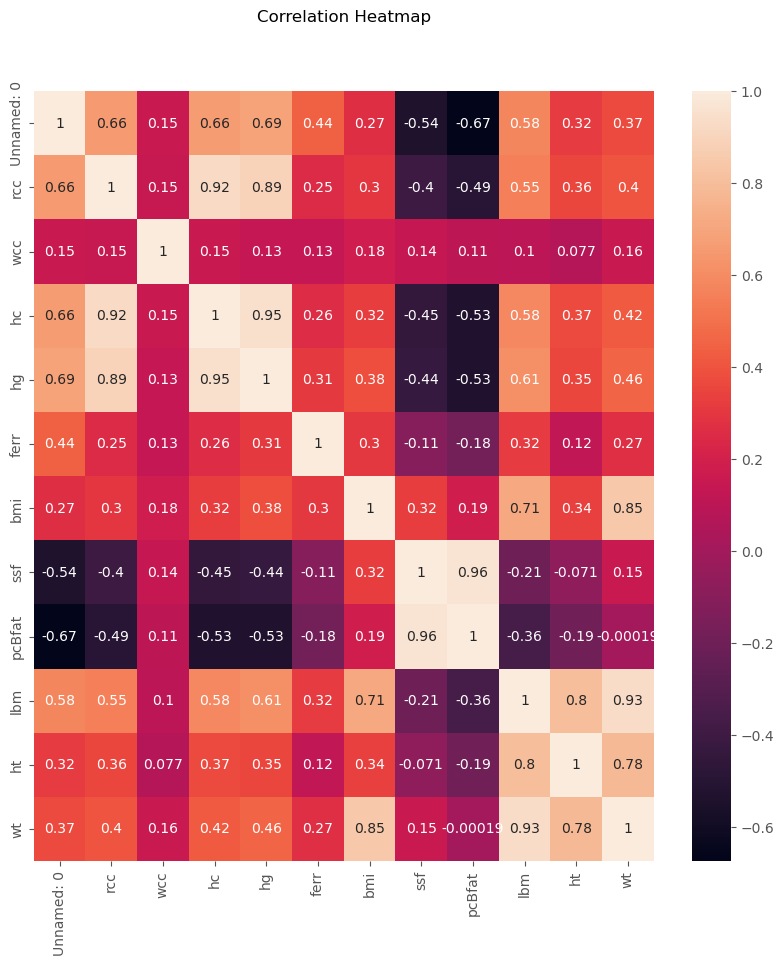

In [12]:
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=50);

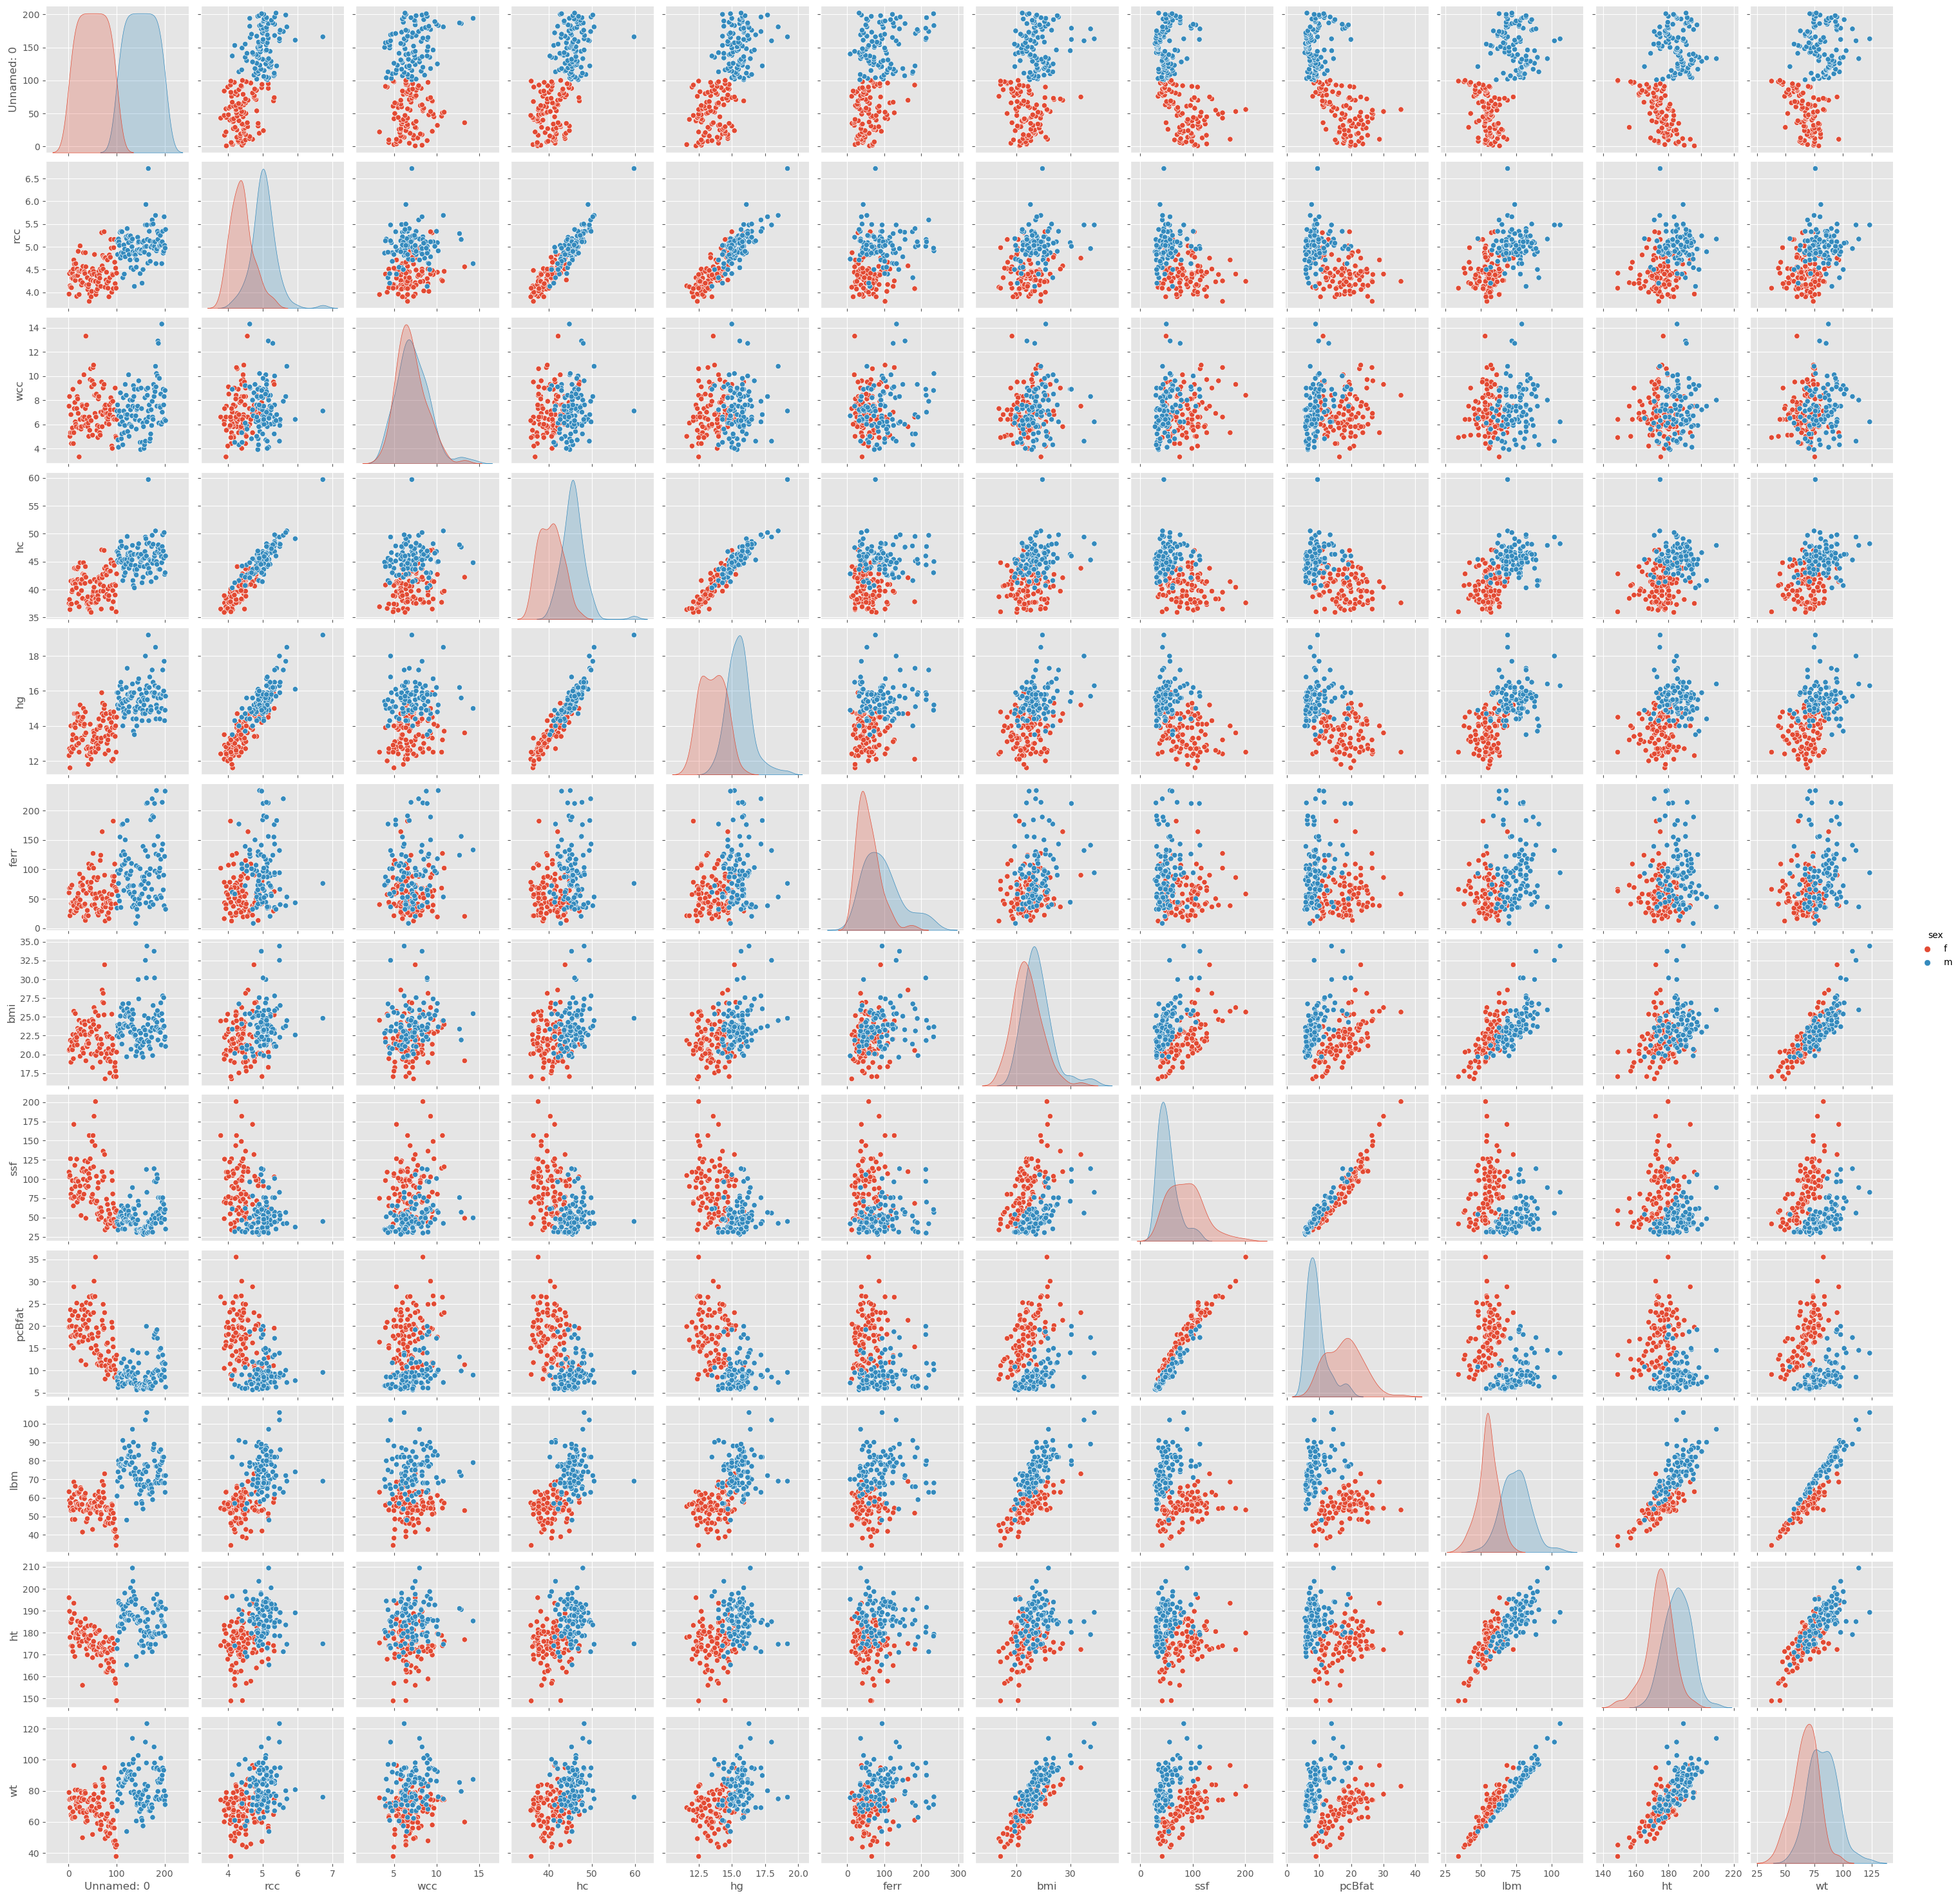

In [22]:
sns.pairplot(data=df, hue='sex')

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [14]:
# ANSWER

X = df.drop(['sex', 'sport'], axis = 1)

In [15]:
from sklearn.preprocessing import StandardScaler

# StandardScalerのインスタンスを作成し、データを標準化
scaler = StandardScaler()
Xscaled_data = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [16]:
# ANSWER

from sklearn.cluster import KMeans

k = 3
# 3 Clusters
k_mean3 = KMeans(n_clusters=k)
k_mean3.fit(Xscaled_data)

/Users/ayano/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### 5. Get the labels for the models

In [17]:
# ANSWER

labels = k_mean3.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


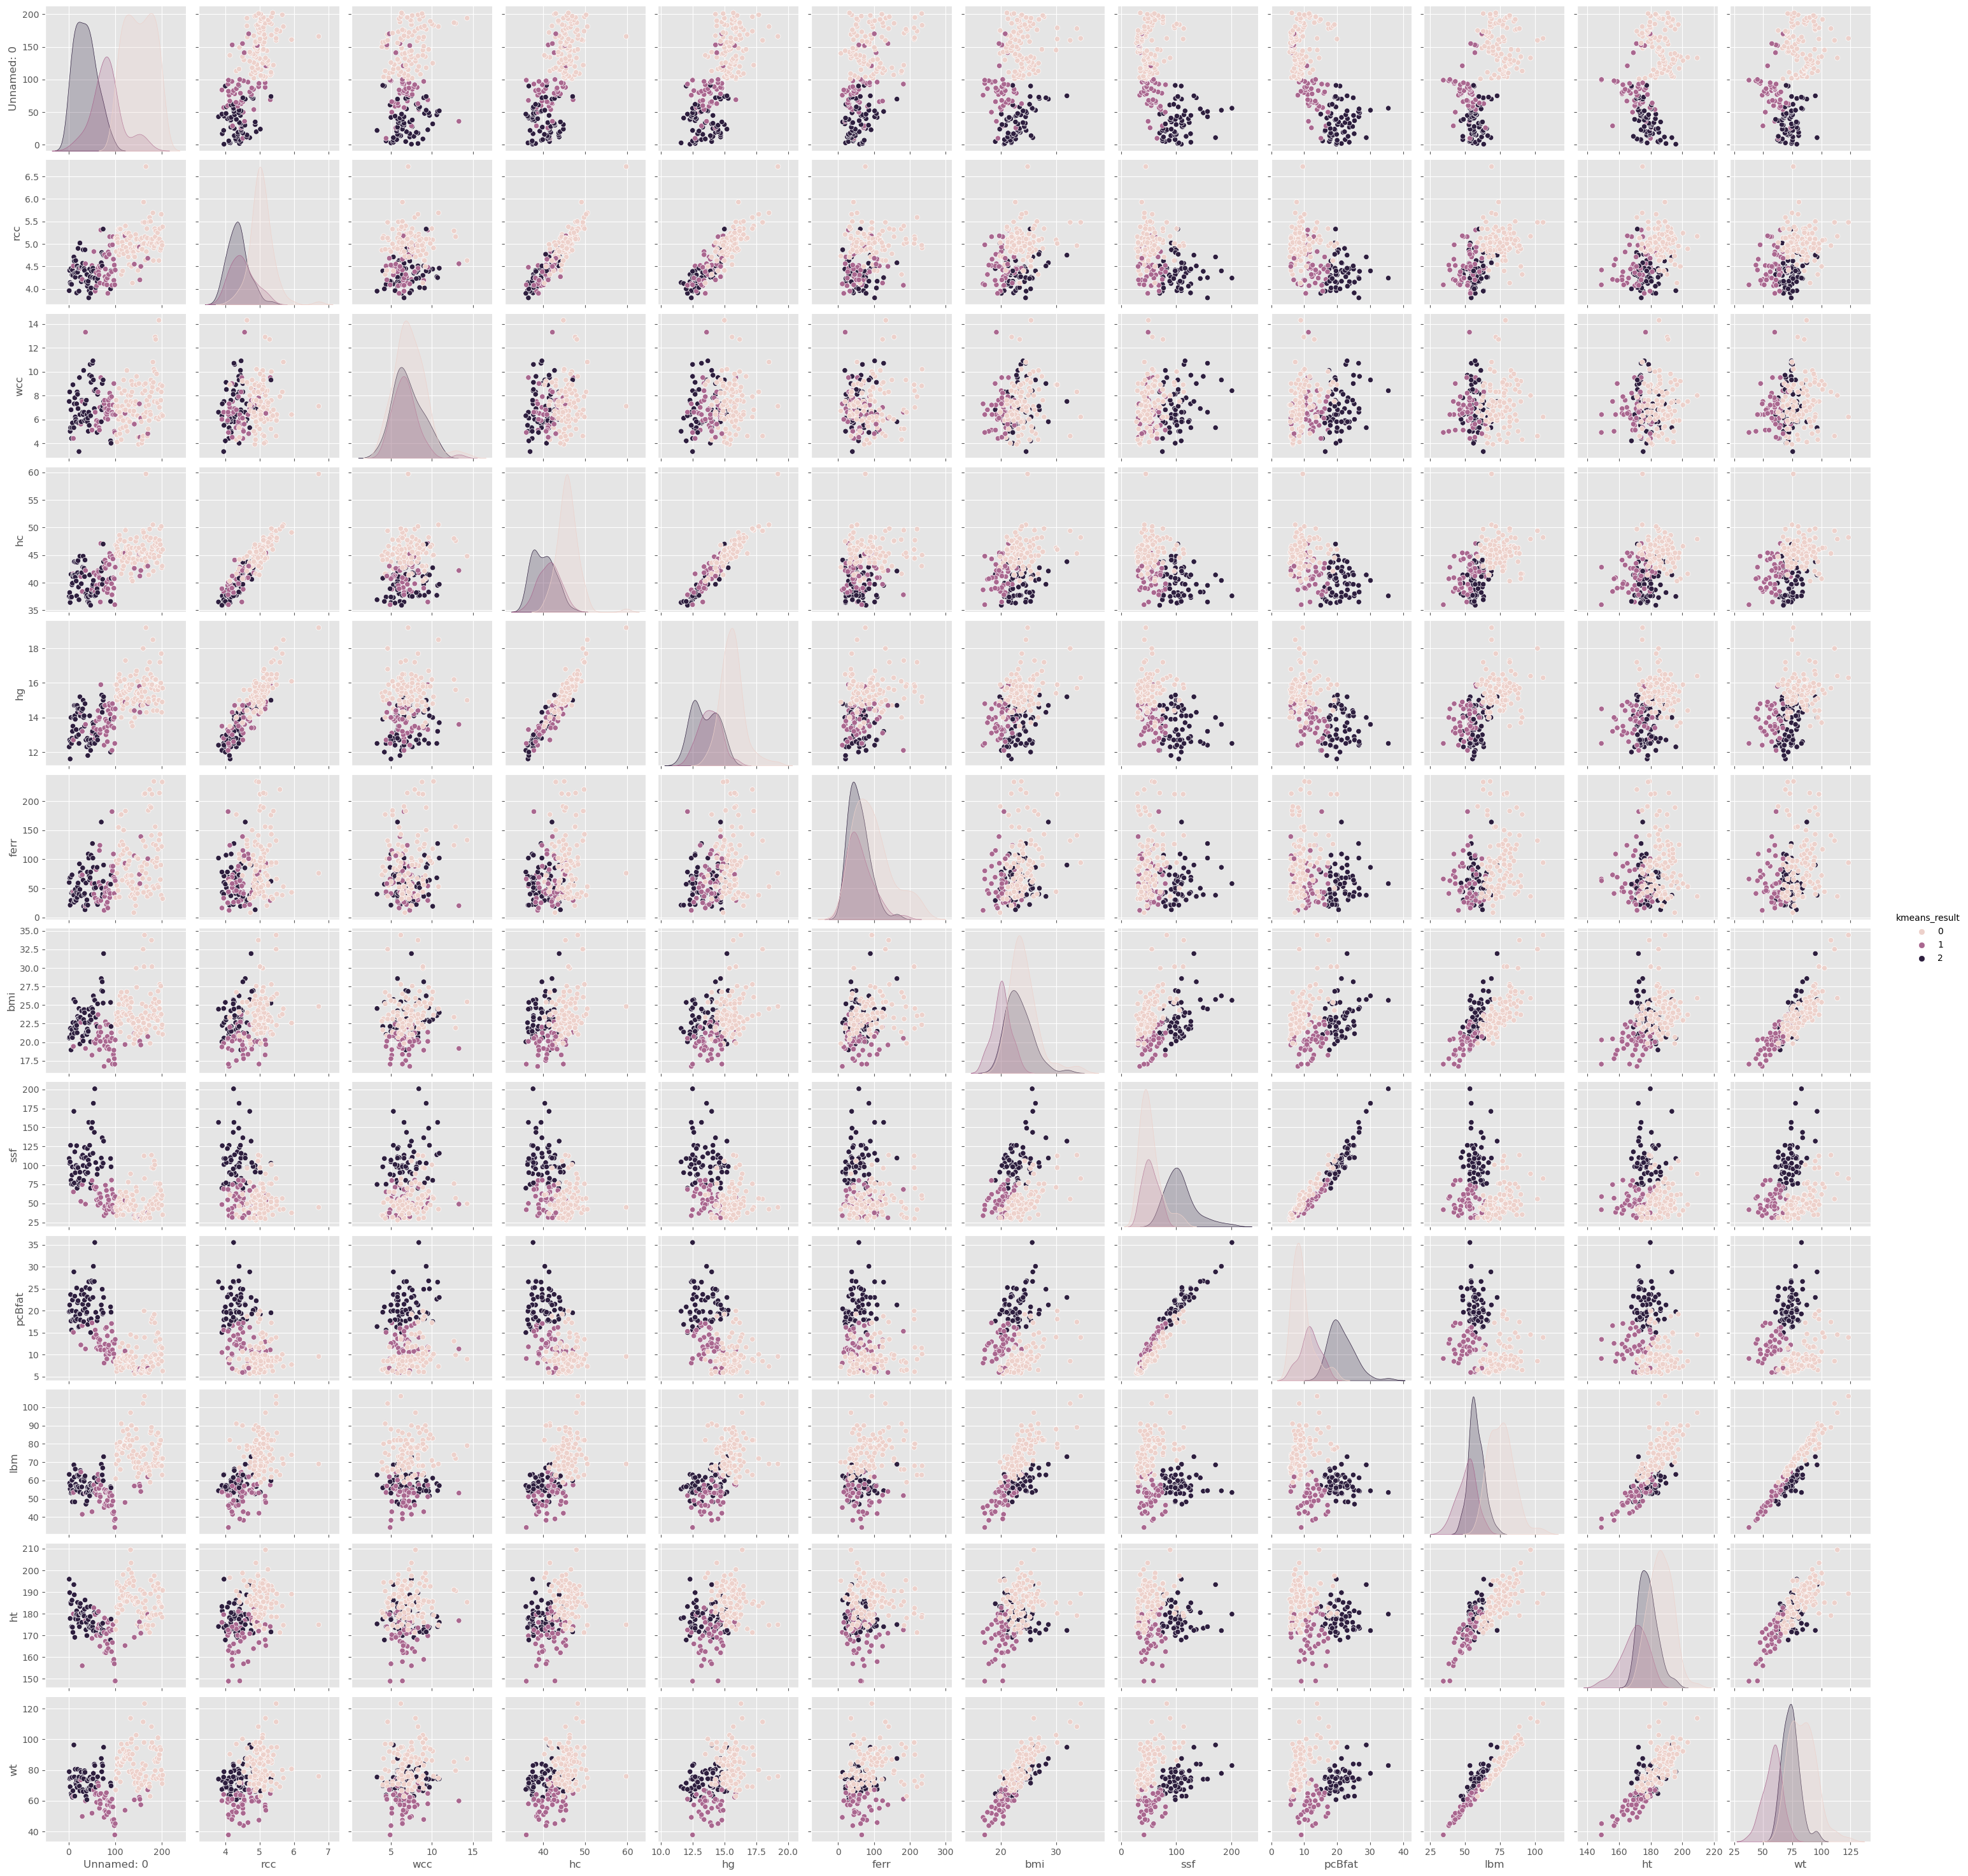

In [18]:
result_df = pd.concat([X, pd.DataFrame(labels, columns=['kmeans_result'])], axis=1)
sns.pairplot(result_df, hue='kmeans_result')

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [24]:
# ANSWER

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xscaled_data)
    Sum_of_squared_distances.append(km.inertia_)


/Users/ayano/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayano/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayano/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ayano/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

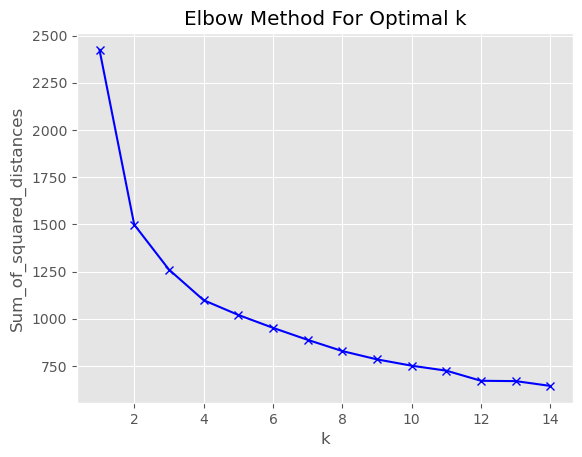

In [25]:
# ANSWER

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

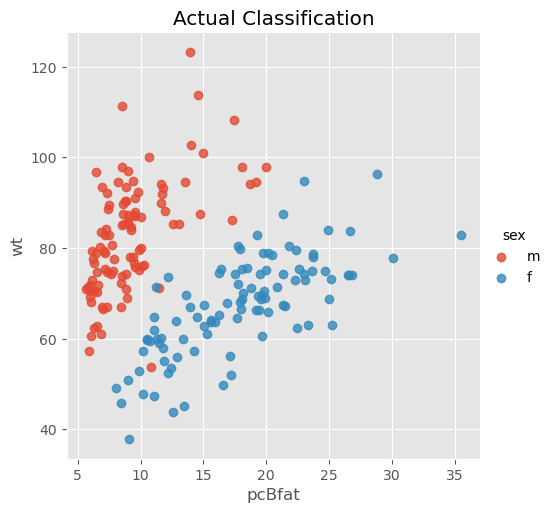

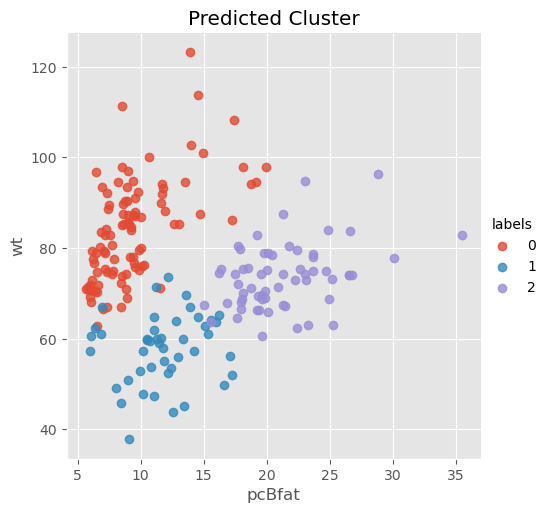

In [29]:
# ANSWER

#length x groove_length
df_labels = df 
df_labels['labels'] = labels

sns.lmplot(x='pcBfat', y='wt', data=df_labels, hue='sex',
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=df_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



